In [1]:
%matplotlib inline


# Quaternion Integration

Integrate angular accelerations to a quaternion sequence and animate it.


Automatically created module for IPython interactive environment


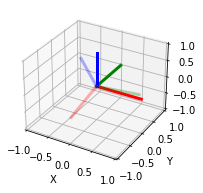

In [2]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from pytransform3d import rotations as pr


def update_lines(step, Q, rot):
    R = pr.matrix_from_quaternion(Q[step])

    # Draw new frame
    rot[0].set_data(np.array([0, R[0, 0]]), [0, R[1, 0]])
    rot[0].set_3d_properties([0, R[2, 0]])

    rot[1].set_data(np.array([0, R[0, 1]]), [0, R[1, 1]])
    rot[1].set_3d_properties([0, R[2, 1]])

    rot[2].set_data(np.array([0, R[0, 2]]), [0, R[1, 2]])
    rot[2].set_3d_properties([0, R[2, 2]])

    return rot


if __name__ == "__main__":
    random_state = np.random.RandomState(3)
    start = pr.random_quaternion(random_state)
    n_frames = 1000
    dt = 0.01
    angular_accelerations = np.empty((n_frames, 3))
    for i in range(n_frames):
        angular_accelerations[i] = pr.random_compact_axis_angle(random_state)
    # Integrate angular accelerations to velocities
    angular_velocities = np.vstack(
        (np.zeros((1, 3)), np.cumsum(angular_accelerations * dt, axis=0)))
    # Integrate angular velocities to quaternions
    Q = pr.quaternion_integrate(angular_velocities, q0=start, dt=dt)

    fig = plt.figure(figsize=(4, 3))

    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_zlim((-1, 1))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    R = pr.matrix_from_quaternion(start)

    rot = [
        ax.plot([0, 1], [0, 0], [0, 0], c="r", lw=3)[0],
        ax.plot([0, 0], [0, 1], [0, 0], c="g", lw=3)[0],
        ax.plot([0, 0], [0, 0], [0, 1], c="b", lw=3)[0],

        ax.plot([0, R[0, 0]], [0, R[1, 0]], [0, R[2, 0]],
                c="r", lw=3, alpha=0.3)[0],
        ax.plot([0, R[0, 1]], [0, R[1, 1]], [0, R[2, 1]],
                c="g", lw=3, alpha=0.3)[0],
        ax.plot([0, R[0, 2]], [0, R[1, 2]], [0, R[2, 2]],
                c="b", lw=3, alpha=0.3)[0]
    ]

    anim = animation.FuncAnimation(fig, update_lines, n_frames,
                                   fargs=(Q, rot),
                                   interval=10, blit=False)

    plt.show()